<img src="../images/aeropython_logo.png" alt="AeroPython" style="width: 300px;"/>

# Ejercicios de análisis de datos con pandas

*Fuente: https://github.com/PyDataMadrid2016/Conference-Info/tree/master/workshops_materials/20160408_1100_Pandas_for_beginners/tutorial por Kiko Correoso, licencia MIT*

En la carpeta de datos tenemos un fichero que se llama *model.txt* que contiene datos de medidas de viento: velocidad, orientación, temperatura...

In [1]:
!head ../data/model.txt

Lat=0  Lon=0  Hub-Height=987  Timezone=88   ASL-Height(avg. 3km-grid)=0
Provider (www.provider.noway) - Computed at 3km resolution based on GLOBAL data (designed for correlation purposes)
 
YYYYMMDD HHMM  M(m/s) D(deg)  T(C)  De(k/m3) PRE(hPa)      RiNumber  RH(%)
19840101 0000   20.8    243    7.3    1.25    1002.8           0.04   86.3
19840101 0100   20.8    243    7.3    1.25    1002.2           0.04   86.9
19840101 0200   20.6    243    7.4    1.24    1001.8           0.04   87.0
19840101 0300   20.4    244    7.5    1.24    1001.5           0.05   86.2
19840101 0400   20.3    245    7.5    1.24    1001.2           0.05   85.6
19840101 0500   20.4    245    7.6    1.24    1000.9           0.06   85.2


In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

from IPython.display import display

In [3]:
model = pd.read_csv(
    "../data/model.txt", delim_whitespace=True, skiprows = 3,
    parse_dates = {'Timestamp': [0, 1]}, index_col = 'Timestamp')

In [4]:
model.head()

,M(m/s),D(deg),T(C),De(k/m3),PRE(hPa),RiNumber,RH(%)
Timestamp,,,,,,,
1984-01-01 00:00:00,20.8,243,7.3,1.25,1002.8,0.04,86.3
1984-01-01 01:00:00,20.8,243,7.3,1.25,1002.2,0.04,86.9
1984-01-01 02:00:00,20.6,243,7.4,1.24,1001.8,0.04,87.0
1984-01-01 03:00:00,20.4,244,7.5,1.24,1001.5,0.05,86.2
1984-01-01 04:00:00,20.3,245,7.5,1.24,1001.2,0.05,85.6


## Ejercicios

Sobre el conjunto de datos `model`:

> 1. Representar la matriz `scatter` de la velocidad y orientación del viento de los primeros mil registros.
2. Misma matriz scatter para los 1000 registros con mayor velocidad, ordenados.
3. Histograma de la velocidad del viento con 36 particiones.
4. Histórico de la velocidad media, con los datos agrupados por años y meses.
5. Tabla de velocidades medias en función del año (filas) y del mes (columnas).
6. Gráfica con los históricos de cada año, agrupados por meses, superpuestos.

Representamos la matriz _scatter_ de la velocidad y orientación del viento de los primeros mil registros:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7f18eec18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd7f161ac18>]], dtype=object)

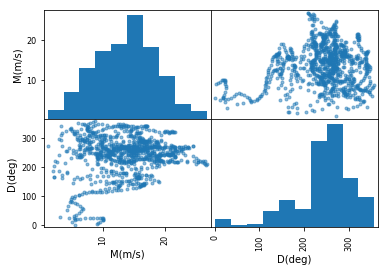

In [5]:
pd.tools.plotting.scatter_matrix(model.ix[:1000, 'M(m/s)':'D(deg)'])

Misma matriz _scatter_ para los 1000 registros con mayor velocidad:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7f1524470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd7f1414a20>]], dtype=object)

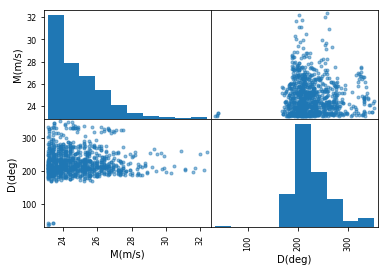

In [6]:
pd.tools.plotting.scatter_matrix(
    model.sort_values('M(m/s)', ascending=False).ix[:1000, 'M(m/s)':'D(deg)'])

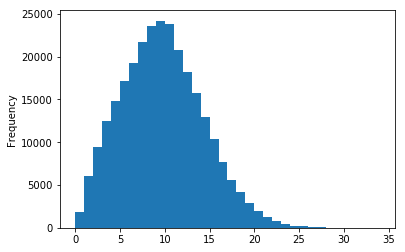

In [7]:
model.loc[:, 'M(m/s)'].plot.hist(bins=np.arange(0, 35))

In [8]:
model['month'] = model.index.month
model['year'] = model.index.year

Histórico de la velocidad media:

In [9]:
model.groupby(by = ['year', 'month']).mean().head(24)

M(m/s)      D(deg)       T(C)  De(k/m3)     PRE(hPa)  \
year month                                                            
1984 1      13.821505  233.603495   4.621505  1.247419   993.974328   
     2      10.043534  164.089080   3.522701  1.269368  1007.659339   
     3       8.708199  153.081989   4.138306  1.261425  1003.437231   
     4       7.939583  162.113889   6.781111  1.255986  1008.487083   
     5       8.283871  123.590054   8.034677  1.238763   998.939113   
     6       7.330833  231.652778  12.068194  1.228417  1005.009861   
     7       7.710618  222.166667  14.508199  1.219906  1006.686962   
     8       7.324194  147.930108  16.510484  1.210497  1006.095565   
     9       9.335694  231.116667  13.960000  1.210347   997.008889   
     10     10.985215  225.610215  12.109140  1.223790  1001.571505   
     11     10.789306  189.393056   9.877639  1.223389   993.419167   
     12      9.600941  213.807796   6.825000  1.253763  1006.855242   
1985 1      10.424059  157.752688   1.499059  1.269126  1000.074059   
     2       8.649851  150.980655   1.323512  1.283512  1010.598214   
     3       9.097043  190.330645   3.800000  1.259046  1000.441667   
     4      10.895833  217.081944   7.155694  1.242097   998.885694   
     5       9.147984  166.154570   9.715726  1.233145  1001.046371   
     6       8.583056  201.036111  11.734444  1.225500  1001.283194   
     7       8.865860  216.310484  15.546640  1.211720  1003.435484   
     8      10.379704  224.643817  14.996774  1.210685  1000.788306   
     9       8.181250  228.433333  14.561250  1.220333  1007.310000   
     10      8.021640  156.831989  12.262231  1.235470  1011.755645   
     11     10.734167  196.769444   5.608333  1.252042  1000.843611   
     12     12.567339  220.547043   7.274328  1.243387  1000.259409   

              RiNumber      RH(%)  
year month                         
1984 1       -2.823320  81.038575  
     2      -29.335790  83.860201  
     3        0.250726  84.740591  
     4       -1.655014  74.165417  
     5       -0.384704  87.813306  
     6       11.744944  81.090694  
     7        3.071788  78.730376  
     8        4.732742  79.204704  
     9       -6.703986  81.153889  
     10      -9.919731  83.965188  
     11    -183.106069  86.480694  
     12     -28.626452  87.389651  
1985 1      -21.708602  82.745430  
     2        1.706592  82.009226  
     3       -0.927110  87.532258  
     4       -5.238778  82.452083  
     5        6.960806  87.404570  
     6       -0.569833  82.841944  
     7        2.259113  80.224194  
     8        0.740094  80.920296  
     9       -2.072278  80.053889  
     10    -126.452137  82.420565  
     11     -18.886847  78.602639  
     12      -5.167849  88.165457

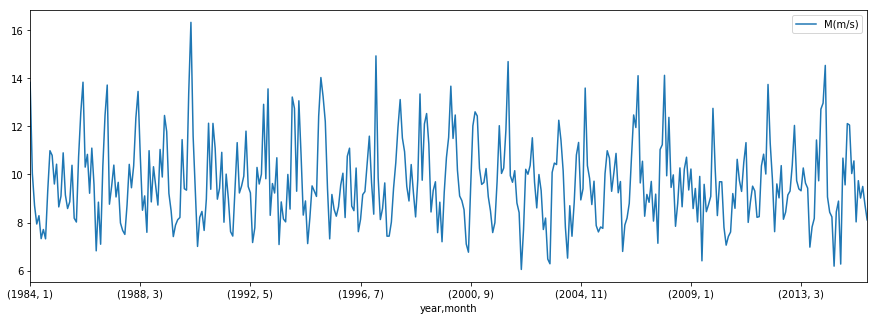

In [10]:
model.groupby(by=['year', 'month']).mean().plot(y='M(m/s)', figsize=(15, 5))

Media móvil de los datos agrupados por mes y año:

In [11]:
monthly = model.groupby(by=['year', 'month']).mean()
monthly['ma'] = monthly.loc[:, 'M(m/s)'].rolling(5, center=True).mean()
monthly.head()

M(m/s)      D(deg)      T(C)  De(k/m3)     PRE(hPa)   RiNumber  \
year month                                                                      
1984 1      13.821505  233.603495  4.621505  1.247419   993.974328  -2.823320   
     2      10.043534  164.089080  3.522701  1.269368  1007.659339 -29.335790   
     3       8.708199  153.081989  4.138306  1.261425  1003.437231   0.250726   
     4       7.939583  162.113889  6.781111  1.255986  1008.487083  -1.655014   
     5       8.283871  123.590054  8.034677  1.238763   998.939113  -0.384704   

                RH(%)        ma  
year month                       
1984 1      81.038575       NaN  
     2      83.860201       NaN  
     3      84.740591  9.759339  
     4      74.165417  8.461204  
     5      87.813306  7.994621

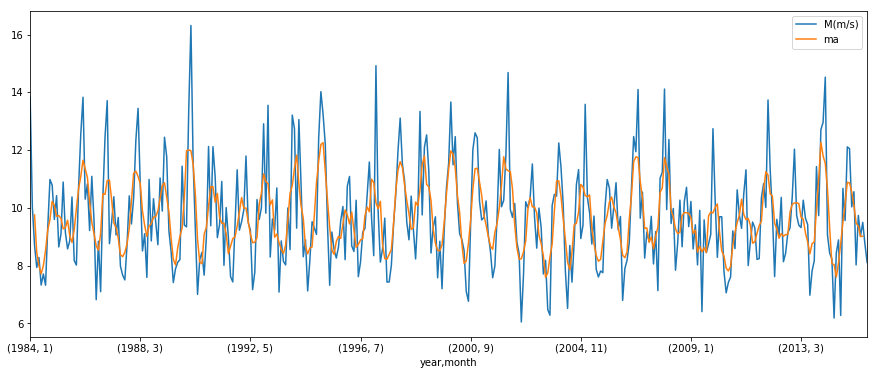

In [12]:
monthly.loc[:, ['M(m/s)', 'ma']].plot(figsize=(15, 6))

In [13]:
monthly.loc[:, 'M(m/s)'].reset_index().pivot(index='year', columns='month')

M(m/s)                                                         \
month         1          2          3          4          5          6    
year                                                                      
1984   13.821505  10.043534   8.708199   7.939583   8.283871   7.330833   
1985   10.424059   8.649851   9.097043  10.895833   9.147984   8.583056   
1986   13.830972  10.303423  10.832527   9.217222  11.092742   9.570000   
1987    8.762231   9.502530  10.386962   9.063056   9.670161   7.983889   
1988   12.345430  13.447557  10.783333   8.511806   9.107661   7.594167   
1989    9.891935  12.448958  11.776478   9.206944   8.491667   7.417083   
1990   13.390726  16.317262  11.582661   9.273889   7.007796   8.217778   
1991   11.082124   8.971131   9.425000  10.917083   8.013441  10.012361   
1992    9.519624   9.928879  11.797849   9.496667   9.234140   7.170139   
1993   13.553629   8.300298   9.620296   9.226944  10.691801   7.086528   
1994   12.743817   9.300446  13.058468  10.817361   8.309677   8.898056   
1995   14.024866  13.239137  12.197043   9.416944   7.321909   9.166389   
1996   10.754839  11.089511   8.685753   8.493611  10.265726   7.620417   
1997    8.347715  14.924107   9.867876   8.124444   8.584274   9.646667   
1998   13.109677  11.514286  10.942339   9.500417   8.895833  10.409583   
1999   12.528763  11.269048   8.439247   9.330000   9.694220   7.580694   
2000   11.494892  12.468247  10.172715   9.103472   8.910349   8.529167   
2001   10.253495   9.584673   9.664516  10.243333   9.074731   8.480000   
2002   11.843817  14.686756   9.946237   9.673611  10.154435   8.813611   
2003   11.521909   9.675744   8.608065   9.995833   9.328091   7.710972   
2004   12.250134  11.419828  10.138710   7.813889   6.522446   8.699167   
2005   13.587500  10.366071   9.831720   8.748194   9.718414   7.874444   
2006    9.297984  10.054167  10.873118   9.237639   9.704032   6.799444   
2007   14.101075   9.645387  10.546640   8.262500   9.168145   8.840694   
2008   14.116129   9.943103  12.370161   9.460139   9.980376   7.843889   
2009   10.223387   8.581101   9.415591   8.026250   9.916532   6.409583   
2010    8.289919   9.695387   9.692876   7.802083   7.061559   7.421528   
2011   10.500941  11.319940   8.006317   8.849028   9.512500   9.312500   
2012   11.287500   9.791810   7.621102   9.605000   9.024597  10.365000   
2013    9.740323   9.398512   9.320027  10.267222   9.640860   9.429167   
2014   12.961156  14.528125   9.064785   8.428750   8.235349   6.188056   
2015   12.050134  10.035863  10.561156   8.027083   9.739382   9.018056   

                                                                         
month         7          8          9          10         11         12  
year                                                                     
1984    7.710618   7.324194   9.335694  10.985215  10.789306   9.600941  
1985    8.865860  10.379704   8.181250   8.021640  10.734167  12.567339  
1986    6.824866   8.847043   7.099028  10.331855  12.446944  13.712500  
1987    7.672312   7.507796   8.731528  10.418011   9.445417  10.355376  
1988   10.986022   8.857124  10.319167   9.518683   8.726111  11.036559  
1989    7.892876   8.117876   8.210139  11.445430   9.406389   9.345430  
1990    8.460618   7.672581   8.973333  12.126210   9.382361  12.120161  
1991    8.981317   7.620565   7.437778   9.339382  11.320278   9.228898  
1992    7.781048  10.290054   9.600278  10.010215  12.911806   9.820027  
1993    8.857527   8.148925   8.027778   9.998925   8.559306  13.214651  
1994    7.125806   8.196505   9.523194   9.311290   9.085000  12.423925  
1995    8.548118   8.264382   8.653056   9.555376  10.049861   8.207661  
1996    8.129167   9.162634   9.287639  10.456048  11.589306   9.658468  
1997    7.433871   7.436156   8.018889   9.434005  10.480139  11.958468  
1998    9.251882   8.233871   9.785556  13.341532   9.758194  12.096640  
1999    8.846640   7.202285   9.258333  10.698253  1

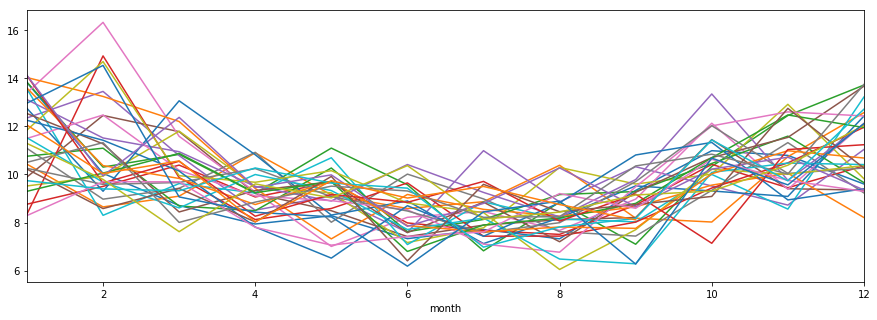

In [14]:
monthly.loc[:, 'M(m/s)'].reset_index().pivot(
    index='year', columns='month'
).T.loc['M(m/s)'].plot(
    figsize=(15, 5), legend=False
)
    

---
<br/>
#### <h4 align="right">¡Síguenos en Twitter!
<br/>
###### <a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">Follow @AeroPython</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script> 
<br/>
###### Este notebook ha sido realizado por: Juan Luis Cano, usando material de Kiko Correoso 
<br/>
##### <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [15]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/aeropython.css'
HTML(open(css_file, "r").read())